## **Resumo**
### **Descrição do DataSet**

*    **Nome:** *Estimation of obesity levels based on eating habits and physical condition Data Set* 
(Estimativa dos níveis de obesidade com base em hábitos alimentares e físicos, em português)
*    **Tamanho:** (2111, 17)
*   **Features:** 
    *   **Features Numéricas:** 8
    *   **Features Categóricas:** 8 (Fuma, Meio de Transporte, Consumo de Álcool, etc)
    *   **Target:** *NObeyesdad* 
        1. Obesity_Type_I
        2. Obesity_Type_III
        3. Obesity_Type_II
        4. Overweight_Level_II
        5. Overweight_Level_I
        5. Normal_Weight
        6. Insufficient_Weight

### **Pré-Processamento sobre os dados**
*   **Datset Original**
*   **Padronizado**
*   **Normalizado**

### **Aplicação de Algoritmos de Classificação para cada conjunto de dados**
*   **RandomForestClassifier**
*   **GradientBoostingClassifier**
*   **SVC**
*   **GaussianNB**
*   **kNN**

### **Resultados**
*  **Em relação as métricas: Acurácia, Precisão, Recall, F1-Score**
      * Grandient Bossting > Random Forest > kNN > SVC > Naives Bayes
*  **Impacto do Escalonamento das Features**
      * kNN, SVC e NaivesBayes

#### **Importando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#### **Carregando dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AprendizadoDeMaquina/datasets/obesidade.csv')
print(df.shape)

(2111, 17)


#### **Descrição Features Numéricas**

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### **Descrição Features Categóricas**

In [ ]:
df.describe(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


#### **Verificando valores nulos**

In [ ]:
np.sum(df.isnull()==True)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### **Quantidade de cada classe**

In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

#### **Plotando Relação de Nível de Obesidade**

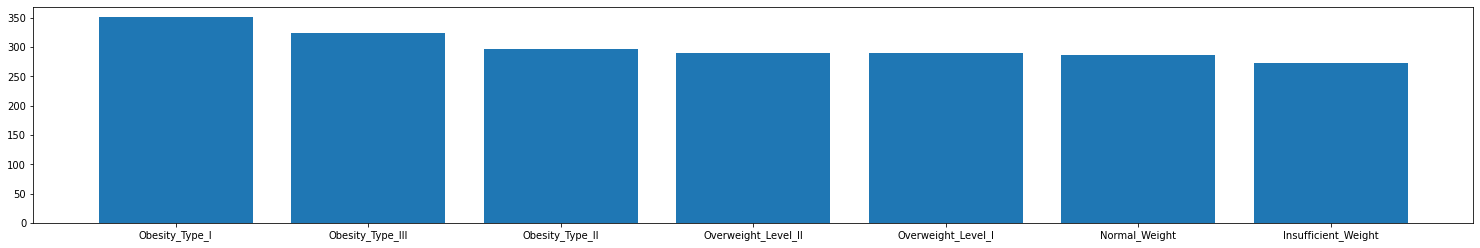

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,0,1,1])
langs = df['NObeyesdad'].value_counts().index.tolist()
values = list(df['NObeyesdad'].value_counts().to_numpy())
plt.rcParams["figure.figsize"] = (20,3)
ax.bar(langs,values)
plt.show();



*   NObeyesdad: nível de obesidade
*   family_history_with_overweight
*   FAVC - Frequent consumption of high caloric food 
*   SMOKE
*   SCC - Calories consumption monitoring
*   CAEC - Consumption of food between meals
*   CALC - Consumption of alcohol
*   MTRANS - Transportation used



#### **Tratando dados Categóricos**

In [ ]:
map_replace = {
    'NObeyesdad': {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6},
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'SMOKE': {'yes': 1, 'no': 0},
    'SCC': {'yes': 0, 'no': 1},
    'CAEC': {'Always': 3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},
    'CALC': {'Always': 3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},
    'MTRANS': {'Automobile': 4, 'Motorbike': 3, 'Public_Transportation': 2, 'Walking': 1, 'Bike': 0}
}
df_convertido = df.replace(map_replace)
df_convertido

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,1,0.000000,1.000000,0,2,1
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,0,3.000000,0.000000,1,2,1
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,1,2.000000,1.000000,2,2,1
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,1,2.000000,0.000000,2,1,5
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,1,0.000000,0.000000,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,1,1.676269,0.906247,1,2,4
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,1,1.341390,0.599270,1,2,4
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,1,1.414209,0.646288,1,2,4
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,1,1.139107,0.586035,1,2,4


In [ ]:
df_dummy = pd.get_dummies(df_convertido, drop_first=True)
df_dummy

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Male
0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,1,0.000000,1.000000,0,2,1,0
1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,0,3.000000,0.000000,1,2,1,0
2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,1,2.000000,1.000000,2,2,1,1
3,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,1,2.000000,0.000000,2,1,5,1
4,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,1,0.000000,0.000000,1,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,1,1.676269,0.906247,1,2,4,0
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,1,1.341390,0.599270,1,2,4,0
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,1,1.414209,0.646288,1,2,4,0
2109,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,1,1.139107,0.586035,1,2,4,0


In [ ]:
X = df_dummy.drop(columns=['NObeyesdad']).to_numpy()
y = df_dummy['NObeyesdad'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43, stratify=y)

#### **Escalonando dados (Padronização)**

In [ ]:
std_scale = preprocessing.StandardScaler()
# O escalonamento é feito apenas numéricos e categóricos que possuem relação entre si 
n_numeric = 15
X_train_numeric_std = std_scale.fit_transform(X_train[:,0:n_numeric])
X_train_std = pd.concat([pd.DataFrame(X_train_numeric_std), pd.DataFrame(X_train[:,n_numeric:-1])], axis=1, join="inner").to_numpy()

X_test_numeric_std = std_scale.transform(X_test[:,0:n_numeric])
X_test_std = pd.concat([pd.DataFrame(X_test_numeric_std), pd.DataFrame(X_test[:,n_numeric:-1])], axis=1, join="inner").to_numpy()

#### **Escalonando dados (Normalizando)**

In [ ]:
minmax_scale = preprocessing.MinMaxScaler()

X_train_numeric_minmax = minmax_scale.fit_transform(X_train[:, 0:n_numeric])
X_train_minmax = pd.concat([pd.DataFrame(X_train_numeric_minmax), pd.DataFrame(X_train[:,n_numeric:-1])], axis=1, join="inner").to_numpy()

X_test_numeric_minmax = minmax_scale.transform(X_test[: , 0:n_numeric])
X_test_minmax = pd.concat([pd.DataFrame(X_test_numeric_minmax), pd.DataFrame(X_test[:,n_numeric:-1])], axis=1, join="inner").to_numpy()

#### **Calculo dos Resultados**

In [ ]:
scalers = ['no scaler', 'minmax', 'std']
n_neighbors = 6
neighbors = np.arange(1, n_neighbors)
results_test = []
results_train = []
resultsNewCompTest = []

for scaler in scalers:
    if scaler == 'minmax':
        X_train_, X_test_ = X_train_minmax, X_test_minmax
    elif scaler == 'std':
        X_train_, X_test_ = X_train_std, X_test_std             
    else:
        X_train_, X_test_ = X_train, X_test

    # RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_, y_train)
    y_pred=clf.predict(X_test_)
    acuraciaRfTest = metrics.accuracy_score(y_test, y_pred)
    precisaoRfTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recallRfTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1RfTest = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    result = { 'model': 'RandomForestClassifier', 'Scaler': scaler, 'Acuracia': acuraciaRfTest, 'Precision': precisaoRfTest, 'Recall': recallRfTest, 'F1-Score': f1RfTest}
    resultsNewCompTest.append(result)

    # GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=150, random_state=43).fit(X_train_, y_train)
    y_pred=clf.predict(X_test_)
    acuraciaGbTest = metrics.accuracy_score(y_test, y_pred)
    precisaoGbTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recallGbTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1GbTest = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    result = { 'model': 'GradientBoosting', 'Scaler': scaler, 'Acuracia': acuraciaGbTest, 'Precision': precisaoGbTest, 'Recall': recallGbTest, 'F1-Score': f1GbTest}
    resultsNewCompTest.append(result)

    # SVC
    clf = svm.SVC(random_state=43)
    clf.fit(X_train_, y_train)
    y_pred=clf.predict(X_test_)
    acuraciaTest = metrics.accuracy_score(y_test, y_pred)
    precisaoTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recallTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1Test = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    result = { 'model': 'SVC', 'Scaler': scaler, 'Acuracia': acuraciaTest, 'Precision': precisaoTest, 'Recall': recallTest, 'F1-Score': f1Test}
    resultsNewCompTest.append(result)
    
    # GaussianNB
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train_, y_train).predict(X_test_)
    acuraciaTest = metrics.accuracy_score(y_test, y_pred)
    precisaoTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recallTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1Test = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    result = { 'model': 'NaivesBayes', 'Scaler': scaler, 'Acuracia': acuraciaTest, 'Precision': precisaoTest, 'Recall': recallTest, 'F1-Score': f1Test}
    resultsNewCompTest.append(result)

    # kNN
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)    
        knn.fit(X_train_, y_train) 
        # Predizendo o conjunto de TREINO para vários K
        y_pred_train = knn.predict(X_train_)
        acuracia = metrics.accuracy_score(y_train, y_pred_train)
        precision = metrics.precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
        f1_score = metrics.f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
        result_train = { 'model': f'kNN (k={k})', 'scaler': scaler, 'Acuracia': acuracia, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
        results_train.append(result_train)
        # Predizendo o conjunto de TESTE para vários K
        y_pred_test = knn.predict(X_test_)
        acuracia = metrics.accuracy_score(y_test, y_pred_test)
        precision = metrics.precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
        f1_score = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
        result_test = { 'model': f'kNN (k={k})', 'scaler': scaler, 'Acuracia': acuracia, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
        results_test.append(result_test)

#### **Motrando valores para diferentes k e escalonamento (conjunto de teste)**

In [ ]:
df_results_test = pd.DataFrame(results_test)
df_results_test.sort_values(by='Acuracia', ascending=False)

,model,scaler,Acuracia,Precision,Recall,F1-Score
0,kNN (k=1),no scaler,0.912879,0.917861,0.912879,0.907466
1,kNN (k=2),no scaler,0.882576,0.886390,0.882576,0.874952
2,kNN (k=3),no scaler,0.875000,0.874428,0.875000,0.865276
3,kNN (k=4),no scaler,0.873106,0.873995,0.873106,0.863946
4,kNN (k=5),no scaler,0.861742,0.859552,0.861742,0.851002
12,kNN (k=3),std,0.850379,0.855188,0.850379,0.846706
10,kNN (k=1),std,0.848485,0.849646,0.848485,0.839909
11,kNN (k=2),std,0.827652,0.831977,0.827652,0.822206
13,kNN (k=4),std,0.825758,0.832061,0.825758,0.818953
14,kNN (k=5),std,0.816288,0.821182,0.816288,0.809121


#### **Motrando valores para diferentes k e escalonamento (conjunto de Treino)**

In [ ]:
df_results_train = pd.DataFrame(results_train)
df_results_train.sort_values(by='Acuracia', ascending=False)

,model,scaler,Acuracia,Precision,Recall,F1-Score
0,kNN (k=1),no scaler,1.000000,1.000000,1.000000,1.000000
5,kNN (k=1),minmax,1.000000,1.000000,1.000000,1.000000
10,kNN (k=1),std,1.000000,1.000000,1.000000,1.000000
1,kNN (k=2),no scaler,0.958939,0.960875,0.958939,0.958811
2,kNN (k=3),no scaler,0.940619,0.942402,0.940619,0.939251
11,kNN (k=2),std,0.917246,0.923392,0.917246,0.916563
3,kNN (k=4),no scaler,0.915982,0.919658,0.915982,0.912908
4,kNN (k=5),no scaler,0.909033,0.911658,0.909033,0.905818
6,kNN (k=2),minmax,0.894504,0.904439,0.894504,0.893764
12,kNN (k=3),std,0.892609,0.893547,0.892609,0.890637


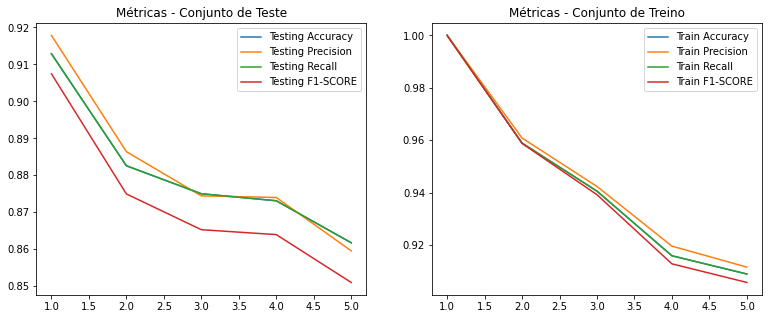

In [ ]:
train_accuracy = df_results_train[df_results_train['scaler'] == 'no scaler']['Acuracia'].to_numpy()
train_precision = df_results_train[df_results_train['scaler'] == 'no scaler']['Precision'].to_numpy()
train_recall = df_results_train[df_results_train['scaler'] == 'no scaler']['Recall'].to_numpy()
train_f1_score = df_results_train[df_results_train['scaler'] == 'no scaler']['F1-Score'].to_numpy()

test_accuracy = df_results_test[df_results_test['scaler'] == 'no scaler']['Acuracia'].to_numpy()
test_precision = df_results_test[df_results_test['scaler'] == 'no scaler']['Precision'].to_numpy()
test_recall = df_results_test[df_results_test['scaler'] == 'no scaler']['Recall'].to_numpy()
test_f1_score = df_results_test[df_results_test['scaler'] == 'no scaler']['F1-Score'].to_numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax2.set_title('Métricas - Conjunto de Treino')
ax2.plot(neighbors, train_accuracy, label = 'Train Accuracy')
ax2.plot(neighbors, train_precision, label = 'Train Precision')
ax2.plot(neighbors, train_recall, label = 'Train Recall')
ax2.plot(neighbors, train_f1_score, label = 'Train F1-SCORE');
ax2.legend();

ax1.set_title('Métricas - Conjunto de Teste')
ax1.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
ax1.plot(neighbors, test_precision, label = 'Testing Precision')
ax1.plot(neighbors, test_recall, label = 'Testing Recall')
ax1.plot(neighbors, test_f1_score, label = 'Testing F1-SCORE');
ax1.legend();

#### **Comparando demais modelos**


*   GradientBoosting
*   RandomForestClassifier
*   SVC
*   NaivesBayes



In [ ]:
df_comp_results_test = pd.DataFrame(resultsNewCompTest)
df_comp_results_test_sort = df_comp_results_test.sort_values(by='F1-Score', ascending=False)
df_comp_results_test_sort

,model,Scaler,Acuracia,Precision,Recall,F1-Score
5,GradientBoosting,minmax,0.964015,0.963816,0.964015,0.963841
9,GradientBoosting,std,0.964015,0.963816,0.964015,0.963841
1,GradientBoosting,no scaler,0.964015,0.963804,0.964015,0.963772
0,RandomForestClassifier,no scaler,0.958333,0.960464,0.958333,0.958737
4,RandomForestClassifier,minmax,0.954545,0.957328,0.954545,0.955136
8,RandomForestClassifier,std,0.952652,0.955090,0.952652,0.953216
10,SVC,std,0.886364,0.888529,0.886364,0.886954
6,SVC,minmax,0.842803,0.842274,0.842803,0.840783
3,NaivesBayes,no scaler,0.562500,0.602144,0.562500,0.547245
2,SVC,no scaler,0.534091,0.531106,0.534091,0.530061


In [ ]:
GBValues = df_comp_results_test_sort[df_comp_results_test_sort['model']=='GradientBoosting']
RFValues = df_comp_results_test_sort[df_comp_results_test_sort['model']=='RandomForestClassifier']
SVCValues = df_comp_results_test_sort[df_comp_results_test_sort['model']=='SVC']
NBValues = df_comp_results_test_sort[df_comp_results_test_sort['model']=='NaivesBayes']

In [ ]:
GBValues

,model,Scaler,Acuracia,Precision,Recall,F1-Score
5,GradientBoosting,minmax,0.964015,0.963816,0.964015,0.963841
9,GradientBoosting,std,0.964015,0.963816,0.964015,0.963841
1,GradientBoosting,no scaler,0.964015,0.963804,0.964015,0.963772


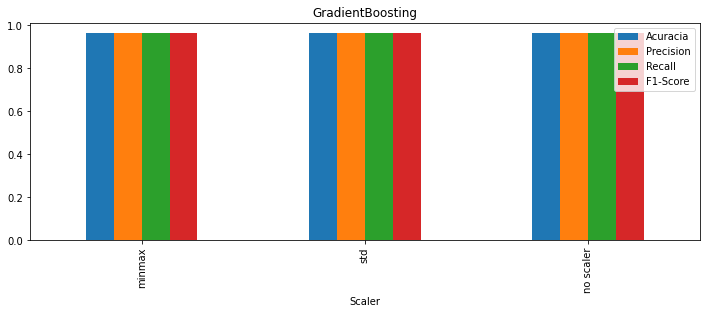

In [ ]:
GBValues.plot(x="Scaler", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(12,4), title="GradientBoosting");

In [ ]:
RFValues

,model,Scaler,Acuracia,Precision,Recall,F1-Score
0,RandomForestClassifier,no scaler,0.958333,0.960464,0.958333,0.958737
4,RandomForestClassifier,minmax,0.954545,0.957328,0.954545,0.955136
8,RandomForestClassifier,std,0.952652,0.955090,0.952652,0.953216


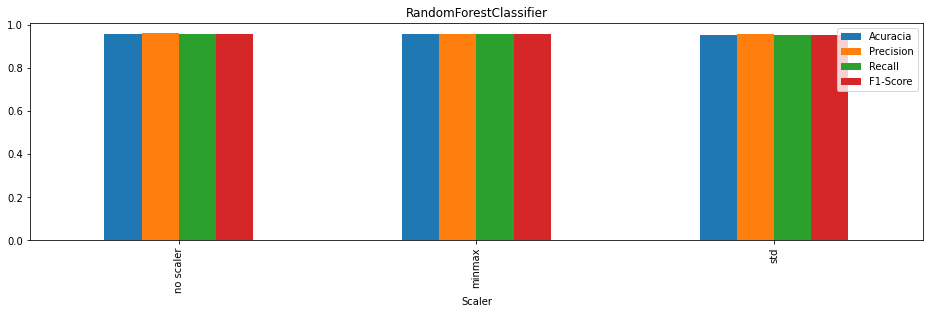

In [ ]:
RFValues.plot(x="Scaler", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(16,4), title="RandomForestClassifier");

In [ ]:
SVCValues

,model,Scaler,Acuracia,Precision,Recall,F1-Score
10,SVC,std,0.886364,0.888529,0.886364,0.886954
6,SVC,minmax,0.842803,0.842274,0.842803,0.840783
2,SVC,no scaler,0.534091,0.531106,0.534091,0.530061


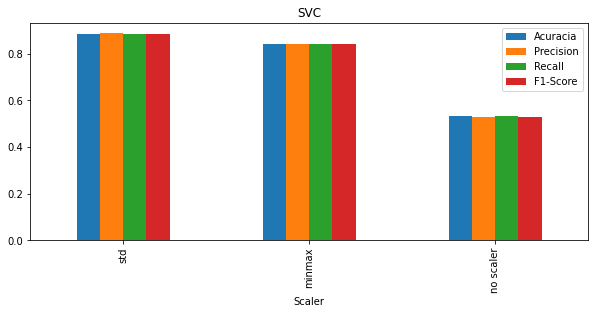

In [ ]:
SVCValues.plot(x="Scaler", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(10,4), title = "SVC");

In [ ]:
NBValues

,model,Scaler,Acuracia,Precision,Recall,F1-Score
3,NaivesBayes,no scaler,0.562500,0.602144,0.562500,0.547245
7,NaivesBayes,minmax,0.541667,0.590415,0.541667,0.524362
11,NaivesBayes,std,0.535985,0.586555,0.535985,0.517502


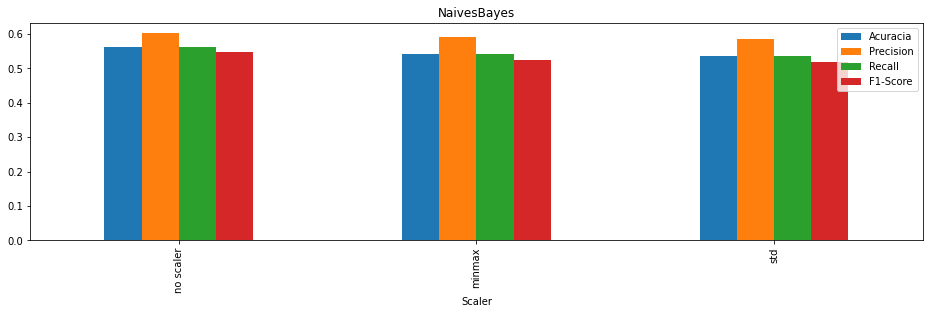

In [ ]:
NBValues.plot(x="Scaler", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(16,4), title="NaivesBayes");

In [ ]:
resultsNewCompTest = []

maxkNNacuracia = df_results_test[df_results_test['Acuracia'].index == df_results_test['Acuracia'].idxmax()]
result = { 'model': maxkNNacuracia['model'].values[0], 'Scaler': maxkNNacuracia['scaler'].values[0], 'Acuracia': maxkNNacuracia['Acuracia'].values[0], 'Precision': maxkNNacuracia['Precision'].values[0], 'Recall': maxkNNacuracia['Recall'].values[0], 'F1-Score': maxkNNacuracia['F1-Score'].values[0]}
resultsNewCompTest.append(result)

maxGBacuracia = GBValues[GBValues['Acuracia'].index == GBValues['Acuracia'].idxmax()]
result = { 'model': maxGBacuracia['model'].values[0], 'Scaler': maxGBacuracia['Scaler'].values[0], 'Acuracia': maxGBacuracia['Acuracia'].values[0], 'Precision': maxGBacuracia['Precision'].values[0], 'Recall': maxGBacuracia['Recall'].values[0], 'F1-Score': maxGBacuracia['F1-Score'].values[0]}
resultsNewCompTest.append(result)

maxRFacuracia = RFValues[RFValues['Acuracia'].index == RFValues['Acuracia'].idxmax()]
result = { 'model': maxRFacuracia['model'].values[0], 'Scaler': maxRFacuracia['Scaler'].values[0], 'Acuracia': maxRFacuracia['Acuracia'].values[0], 'Precision': maxRFacuracia['Precision'].values[0], 'Recall': maxRFacuracia['Recall'].values[0], 'F1-Score': maxRFacuracia['F1-Score'].values[0]}
resultsNewCompTest.append(result)

maxSVCacuracia = SVCValues[SVCValues['Acuracia'].index == SVCValues['Acuracia'].idxmax()]
result = { 'model': maxSVCacuracia['model'].values[0], 'Scaler': maxSVCacuracia['Scaler'].values[0], 'Acuracia': maxSVCacuracia['Acuracia'].values[0], 'Precision': maxSVCacuracia['Precision'].values[0], 'Recall': maxSVCacuracia['Recall'].values[0], 'F1-Score': maxSVCacuracia['F1-Score'].values[0]}
resultsNewCompTest.append(result)

maxNBacuracia = NBValues[NBValues['Acuracia'].index == NBValues['Acuracia'].idxmax()]
result = { 'model': maxNBacuracia['model'].values[0], 'Scaler': maxNBacuracia['Scaler'].values[0], 'Acuracia': maxNBacuracia['Acuracia'].values[0], 'Precision': maxNBacuracia['Precision'].values[0], 'Recall': maxNBacuracia['Recall'].values[0], 'F1-Score': maxNBacuracia['F1-Score'].values[0]}
resultsNewCompTest.append(result)

bestAcuracy = pd.DataFrame(resultsNewCompTest).sort_values(by='F1-Score', ascending=False);

In [ ]:
bestAcuracy

,model,Scaler,Acuracia,Precision,Recall,F1-Score
1,GradientBoosting,minmax,0.964015,0.963816,0.964015,0.963841
2,RandomForestClassifier,no scaler,0.958333,0.960464,0.958333,0.958737
0,kNN (k=1),no scaler,0.912879,0.917861,0.912879,0.907466
3,SVC,std,0.886364,0.888529,0.886364,0.886954
4,NaivesBayes,no scaler,0.562500,0.602144,0.562500,0.547245


**Comparando todos os modelos**

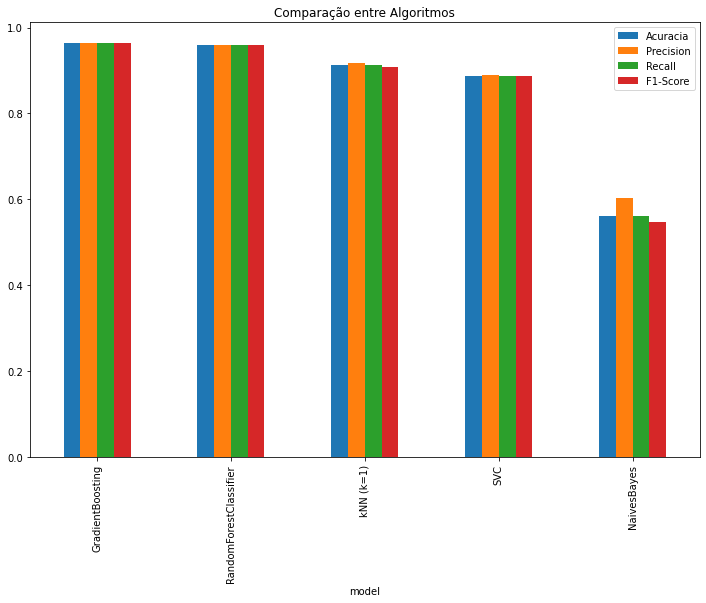

In [ ]:
bestAcuracy.plot(x="model", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(12,8), title="Comparação entre Algoritmos");